# Descriptive analysis of an e-comm dataset

In [85]:
import pandas as pd
import numpy as np
import psycopg2 as pg
import time
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

file = pd.read_csv('ecommerce_dataset_updated.csv')
df = pd.DataFrame(file)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
None


<div style="color: #011140; font-family: Arial; font-size: 20px; font-weight: bold">
    Monthly Sales performance
</div>

<div style="color: gray; font-family: Arial; font-size: 14px;">The following chart shows the sales performance by month during 2024. The double axis chart shows the patterns of increase in orders and revenue throughout the year, evidencing a discrepancy in February between the amount earned and the number of orders placed. Peak sales can be seen in April, July and October, matching the special promos launched that year.  NOTE: There is no data for the month of December.
</div>

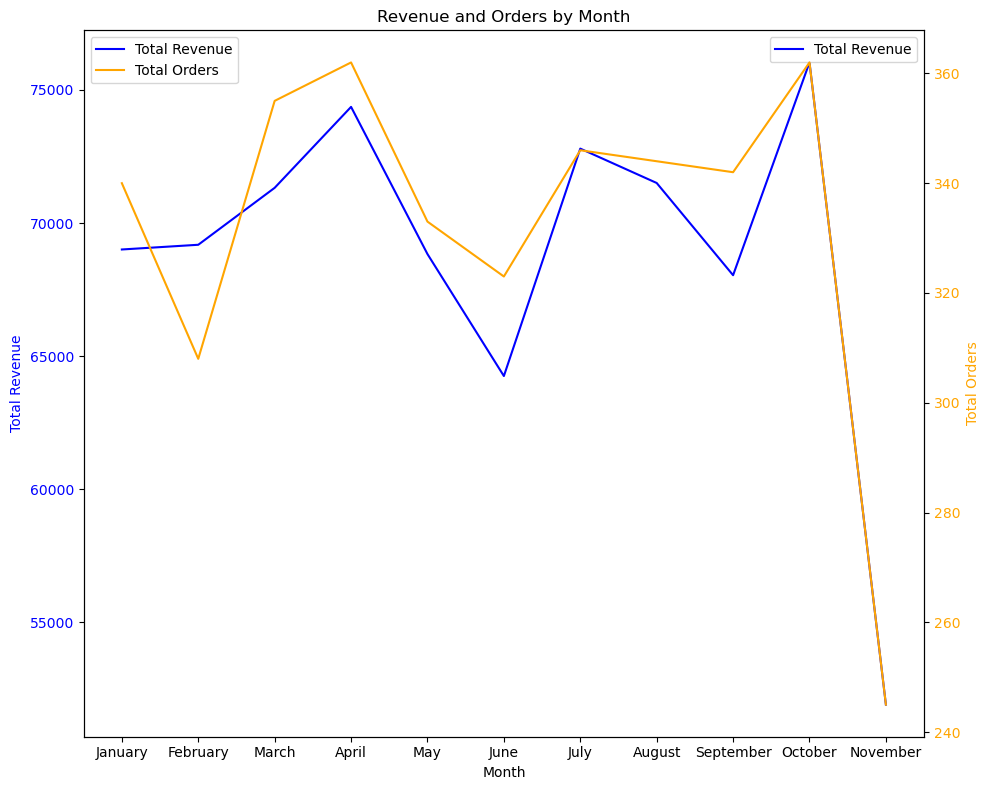

<Figure size 640x480 with 0 Axes>

In [89]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'],dayfirst=True)
df['Month'] = df['Purchase_Date'].dt.month

df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x])

df['Month_Name'] = pd.Categorical(
    df['Month_Name'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)
sales_by_month = df.groupby(['Month', 'Month_Name'],observed=True)['Final_Price(Rs.)'].sum().reset_index()
sales_by_month = sales_by_month.sort_values('Month')

orders_by_month = df.groupby(['Month', 'Month_Name'],observed=True)['User_ID'].nunique().reset_index()
orders_by_month = orders_by_month.sort_values('Month')

df = df.sort_values('Month_Name')

fig, ax1 = plt.subplots(figsize=(10, 8))

sns.lineplot(data=sales_by_month, x='Month_Name', y='Final_Price(Rs.)', ax=ax1, label='Total Revenue', color='blue')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Month')

# Create a secondary y-axis for Total Orders
ax2 = ax1.twinx()
sns.lineplot(data=orders_by_month, x='Month_Name', y='User_ID', ax=ax2, label='Total Orders', color='orange')
ax2.set_ylabel('Total Orders', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a shared title
plt.title('Revenue and Orders by Month')

# Add legends for both lines
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Tight layout for spacing
fig.tight_layout()

# Show and Save
plt.show()
plt.savefig('Sales_and_Orders_by_month_dual_axis.png')

#### February Discrepancy

<div style="color: gray; font-family: Arial; font-size: 14px;">The drop in orders but relatively stable revenue in February suggests higher-priced products were sold that month, or promotions focused on premium categories rather than volume.<br>

STRATEGY: This could indicate successful targeting of high-value customers or the potential to balance pricing strategies to attract more orders.</div>

#### Steady Growth After February

<div style="color: gray; font-family: Arial; font-size: 14px;">Orders and revenue both show steady growth between March and April.<br>

STRATEGY: April's peak seems to be related to seasonal promotions or events. Analyzing what drove this success specifically (e.g., discounts, advertising campaigns) might help replicate the strategy.</div>

#### Mid-Year Drop (June)

<div style="color: gray; font-family: Arial; font-size: 14px;">Both orders and revenue have a decrease in June.<br>

STRATEGY: This could indicate inconsistent customer demand during the summer. Since this pattern is repeated consistently year by year, a deeper dive into pricing strategies and promos during that period could be useful.</div>

#### Seasonal Trends

<div style="color: gray; font-family: Arial; font-size: 14px;">April, July, and October are high-performing months, indicating a potential seasonal pattern (spring, summer, fall).<br>

STRATEGY: Seasonal trends could inform inventory planning, advertising budgets, and staffing needs.</div>

<div style="color: #011140; font-family: Arial; font-size: 20px; font-weight: bold">
    Sales by Product Category
</div>

<div style="color: gray; font-family: Arial; font-size: 14px;">In the graph below, we can see that last year the demand of product has been quite even across categories, with Clothing taking a slight majority with 15%.<br>
A balanced demand suggests no single category is disproportionately driving sales, which reduces reliance on any one product group.<br>
Electronics has the smallest share among categories, which may indicate price sensitivity or higher competition in this sector.<br>
Categories like Books (14.7%), Home & Kitchen (14.6%), and Sports (14.3%) show stable performance, clustering closely around the average.<br>
While Toys (14.2%) and Beauty (13.8%) aren’t the top-performing categories, they still hold substantial demand. Given their slight underperformance, these categories might benefit from innovative marketing approaches.
</div>

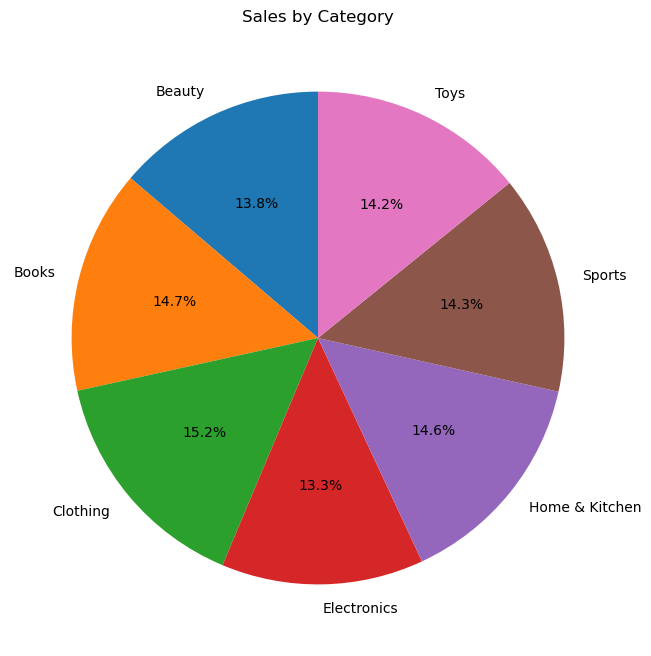

<Figure size 640x480 with 0 Axes>

In [177]:
sales_by_category = df.groupby(['Category'],observed=True)['Final_Price(Rs.)'].sum().reset_index()

labels = sales_by_category['Category']
sizes = sales_by_category['Final_Price(Rs.)']

plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Category')
plt.show()
plt.clf()
plt.savefig('Sales_by_category.png')

#### Clothing Leading by a Small Margin

<div style="color: gray; font-family: Arial; font-size: 14px;">STRATEGY: Marketing campaigns could leverage this existing demand to further grow sales. Highlight popular clothing items during promotions or offer targeted discounts to retain market leadership.</div>


#### Electronics with the Lowest Share (13.3%)

<div style="color: gray; font-family: Arial; font-size: 14px;">STRATEGY: A focused strategy, such as bundling offers or enhancing product visibility, could help boost this category’s sales.</div>

#### Consistent Middle Performers

<div style="color: gray; font-family: Arial; font-size: 14px;">STRATEGY: These are steady revenue generators. Investing in seasonal promotions (e.g., holiday sales for Home & Kitchen) could encourage additional growth while maintaining stability.</div>

#### Toys and Beauty as Growth Opportunities

<div style="color: gray; font-family: Arial; font-size: 14px;">STRATEGY:<br>
For Toys: Enhance promotional holiday gift bundles or target parents with promotions.<br>
For Beauty: Leverage social media influencers or launch campaigns centered around popular products.</div>

<div style="color: #011140; font-family: Arial; font-size: 20px; font-weight: bold">
    Discounts and Promos
</div>

<div style="color: gray; font-family: Arial; font-size: 14px;">During 2024, the most offered discount coupon has been 15%.<br>
    The sum of the discounts accounted for a total of \$175,292.39, which is 18.79% of the total sales revenue.<br>
    The product category with the highest amount discounted was "Books".<br>
    The highest discount coupon offered was 50% off, and the category where it generated highest number of orders was "Home & Kitchen".<br>
    The average Revenue with discount applied in 2024 was \$206.90, while the average without discount was \$254.80.</div>


In [209]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.),Purchase_Date,Month,total_discounted
count,3660.000000,3660.000000,3660.000000,3660,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579,2024-06-13 00:46:01.967213056,5.912295,47.894096
min,10.090000,0.000000,5.890000,2024-01-01 00:00:00,1.000000,0.000000
25%,134.012500,5.000000,104.512500,2024-03-24 00:00:00,3.000000,10.537500
50%,253.845000,15.000000,199.185000,2024-06-11 12:00:00,6.000000,32.310000
75%,377.595000,25.000000,304.117500,2024-09-03 00:00:00,9.000000,69.422500
max,499.960000,50.000000,496.820000,2024-11-21 00:00:00,11.000000,249.980000
std,141.682621,14.731338,122.687844,NaN,3.096907,50.956161


15.0
175292.39
18.796691042554674
Category
Beauty            23417.94
Books             27222.36
Clothing          24399.71
Electronics       24857.91
Home & Kitchen    26513.43
Sports            25963.20
Toys              22917.84
Name: total_discounted, dtype: float64


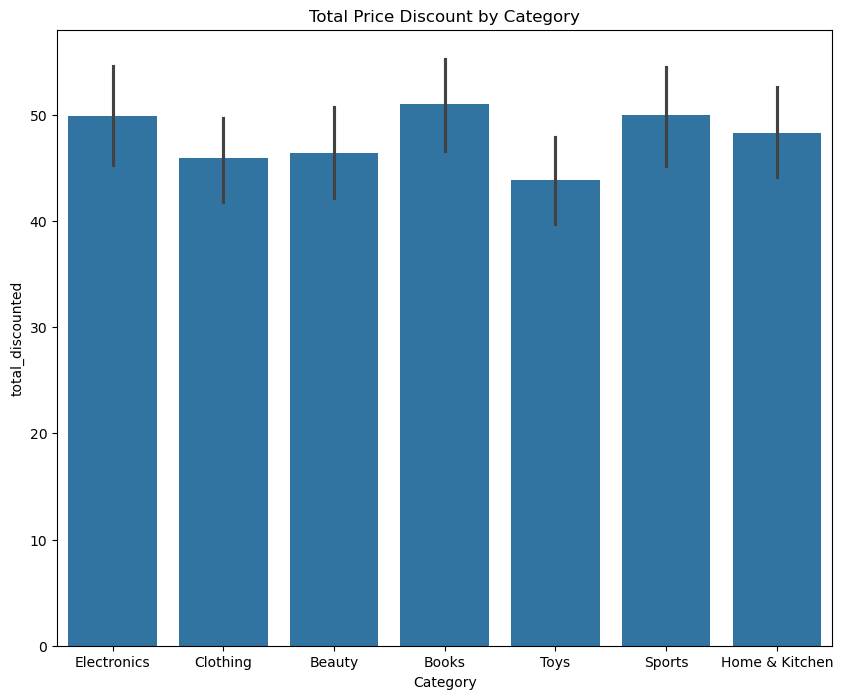

<Figure size 640x480 with 0 Axes>

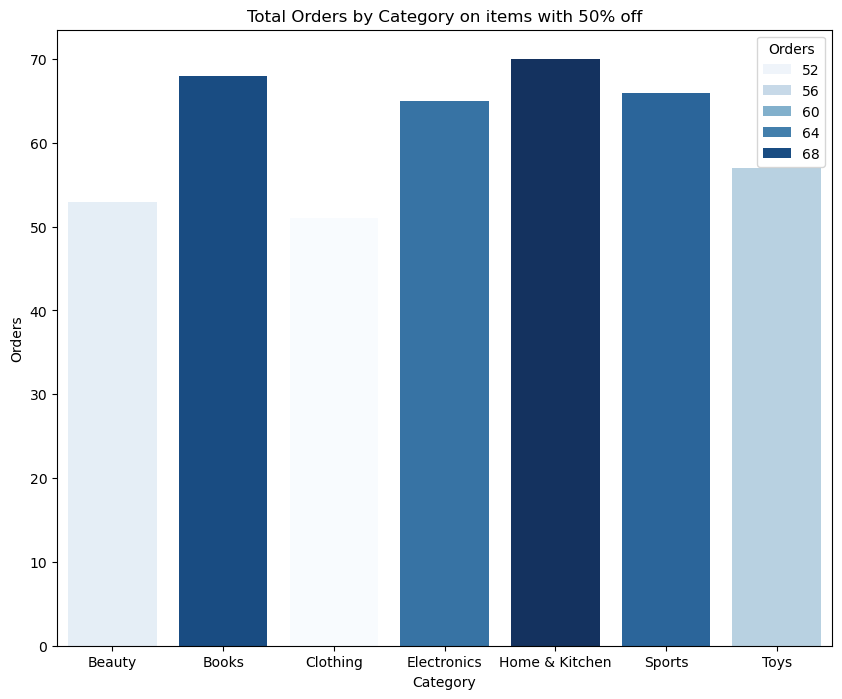

<Figure size 640x480 with 0 Axes>

In [221]:
#Most offered discount of 2024
median_discount = df['Discount (%)'].median()
print(median_discount)

#total price discount of 2024
df['total_discounted'] = df['Price (Rs.)'] - df['Final_Price(Rs.)']
print(df['total_discounted'].sum())

#Total % discounted from revenue
percent_discounted_total = df['total_discounted'].sum()/df['Price (Rs.)'].sum()*100
print(percent_discounted_total)

print(df.groupby(['Category'])['total_discounted'].sum())

#Discount by category 
plt.figure(figsize=(10,8))
sns.barplot(x='Category', y='total_discounted', data=df)
plt.title('Total Price Discount by Category')
plt.show()
plt.clf()
plt.savefig('Discount_by_category.png')

categories_50_off = df[df['Discount (%)'] == 50]
category_orders = (
    categories_50_off.groupby('Category')['Product_ID']
    .nunique()  
    .reset_index()
    .rename(columns={'Product_ID': 'Orders'})
)

plt.figure(figsize=(10,8))
sns.barplot(x='Category', y='Orders', data=category_orders, hue='Orders', palette='Blues')
plt.title('Total Orders by Category on items with 50% off')
plt.show()
plt.clf()
plt.savefig('Discount_by_category.png')

#### Insights on Discounts

<div style="color: gray; font-family: Arial; font-size: 14px;">Across most categories, as the discount increases, the final price tends to decrease. While this aligns with expectations, it is interesting to highlight that this relationship holds consistently across all categories.<br>
The drop in final price becomes steeper at higher discount levels (30% and 50%), especially noticeable in categories like Clothing, Home & Kitchen, and Toys.<br>
Clothing shows the largest reduction in average final price at higher discounts (e.g., at 50%, the average final price drops to $117.6).<br>
Electronics has one of the more stable reductions, with prices consistently higher across all discount levels compared to other categories.<br>
Toys seems to have smaller reductions in price initially but drops steeply at the 50% discount level.<br>
At 5% discount, some categories (Beauty, Sports, Home & Kitchen) have slightly higher average prices than at no discount (0%). This might indicate certain promotional strategies or rounding adjustments that make small discounts less effective. This is not directly tied to customer preferences but reflects how the discounts are being applied in the data.
</div>

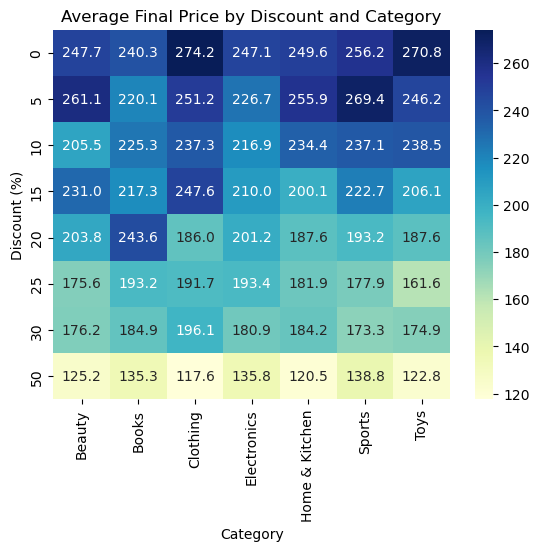

In [233]:
heatmap_data = df.pivot_table(values='Final_Price(Rs.)', index='Discount (%)', columns='Category', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Final Price by Discount and Category')
plt.show()

#### Beauty and Sports: Smaller Discounts Are Effective

<div style="color: gray; font-family: Arial; font-size: 14px;">Customers in these categories may prioritize product quality or features over price reductions. This means small discounts can still drive sales without cutting too much into profits.<br>

STRATEGY: Focus on modest discounts (5-15%) and combine them with value-added promotions (e.g., free accessories, extended warranties for Electronics, or loyalty points for Sports items).
</div>

#### Clothing and Toys: Significant Price Drops at Higher Discounts

<div style="color: gray; font-family: Arial; font-size: 14px;">These categories are highly price-sensitive, and customers are more likely to purchase at steep discounts.<br>
There are two scenarios that could explain this:<br>
1) Higher Discounts = Lower-Priced Items Sold: At higher discount levels, customers may prioritize cheaper items within that category. This would bring the average price down, even if total sales increased.<br>
2) Higher Discounts = Lower Sales Volume
Another possibility is that the discounts weren’t as effective in driving sales, and only a small number of cheaper items were purchased.<br> 
STRATEGY: Use high discounts (30-50%) strategically for clearance sales or seasonal promotions.<br>
Create bundle offers (e.g., buy 2 get 1 free) to clear inventory while still increasing the average transaction value.<br>
</div>

#### Beauty and Books: Lower Price Sensitivity

<div style="color: gray; font-family: Arial; font-size: 14px;">Customers in these categories may value the product itself more than the discount (e.g., a specific beauty brand or a book’s content).
Discounts might not be the primary driver of sales; other factors like product quality, availability, or exclusivity could be more important.<br>
STRATEGY: Offer modest discounts (5-15%) paired with exclusive perks like free samples (Beauty) or early access to new releases (Books).<br>
Focus marketing on unique selling points of products (e.g., "Best-selling author," "Organic and cruelty-free beauty products") rather than heavy discounts.<br>
</div>

<div style="color: #011140; font-family: Arial; font-size: 20px; font-weight: bold">
    Customer Orders and Payments
</div>

<div style="color: gray; font-family: Arial; font-size: 14px;">In 2024 we had a total of 3660 orders, with the category "Home & Kitchen" being the one with highest number of orders.<br>
    The most used payment method was Credit Card, accounting for a 20.8% of the total orders. The real total was 760 orders, compared to Cash on Delivery which was the least used payment method, with atotal of 696 orders.</div>


3660


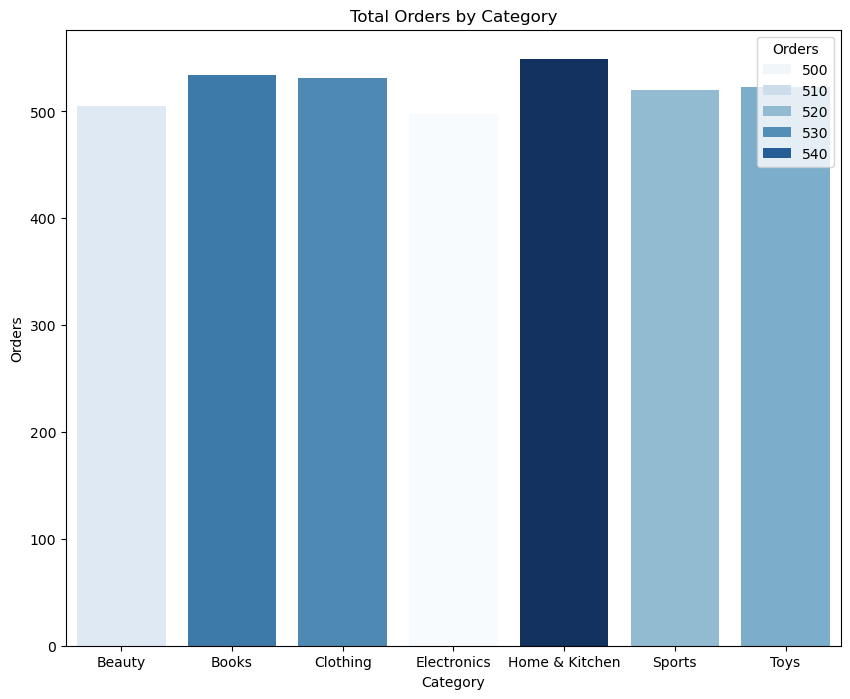

<Figure size 640x480 with 0 Axes>

In [270]:
print(df['Product_ID'].nunique())

category_orders_total = (
    df.groupby('Category')['Product_ID']
    .nunique()  
    .reset_index()
    .rename(columns={'Product_ID': 'Orders'})
)

plt.figure(figsize=(10,8))
sns.barplot(x='Category', y='Orders', data=category_orders_total, hue='Orders', palette='Blues')
plt.title('Total Orders by Category')
plt.show()
plt.clf()
plt.savefig('Orders_by_category.png')

     Payment_Method  Orders
0  Cash on Delivery     696
1       Credit Card     760
2        Debit Card     731
3       Net Banking     716
4               UPI     757


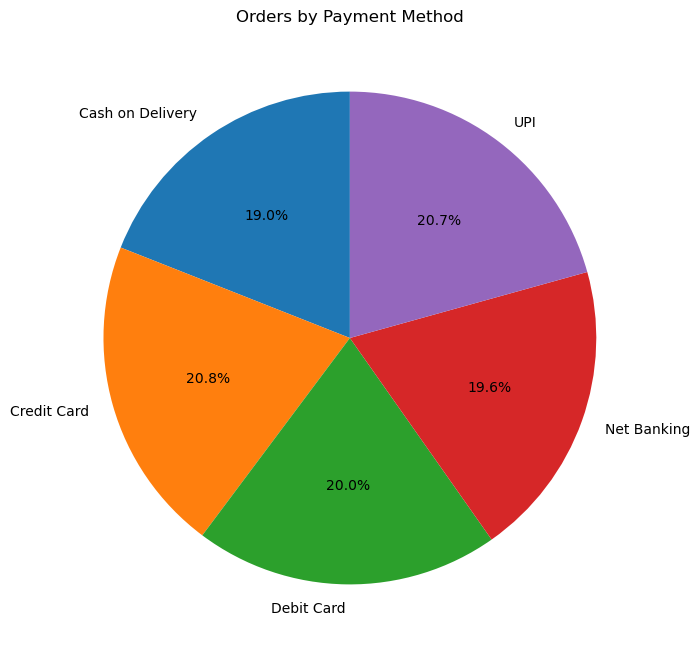

<Figure size 640x480 with 0 Axes>

In [272]:
grouped_by_payment = (
    df.groupby('Payment_Method')['Product_ID']
    .nunique()  
    .reset_index()
    .rename(columns={'Product_ID': 'Orders'})
)

print(grouped_by_payment)

labels = grouped_by_payment['Payment_Method']
sizes = grouped_by_payment['Orders']

plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Orders by Payment Method')
plt.show()
plt.clf()
plt.savefig('Orders_by_payment.png')